#### Reading Data

In [1]:
import numpy as np # for array operations and for mean absolute relative error
import pandas as pd # for working with DataFrames
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('porocal.csv')
df.head()

,GR,NPHI,DT,DDLL,CAL,SP,PHIF,DEPTH
0,100.584839,9.717820,68.486836,10.088133,8.214933,152.518868,16.720,1388.0
1,90.719633,10.742601,68.353292,8.850653,8.214862,153.070232,9.976,1388.1
2,85.966671,11.569975,67.884402,8.250872,8.214865,151.473111,10.520,1388.2
3,84.310091,12.136198,67.568475,8.087051,8.214863,150.235458,10.730,1388.3
4,84.286258,12.447312,67.242100,8.162846,8.214900,149.627142,10.660,1388.4


In [3]:
df.shape

(2500, 8)

In [4]:
X = df.drop(['PHIF','DEPTH'], axis = 1) # Features
y = df['PHIF']  # Target

#### Random Forest Regression Model

In [5]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import metrics   

Data split for test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Data split for validation set

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [8]:
X_train.shape

(1500, 6)

In [9]:
y_train.shape

(1500,)

In [10]:
X_val.shape

(500, 6)

In [11]:
y_val.shape

(500,)

In [12]:
X_test.shape

(500, 6)

In [13]:
y_test.shape

(500,)

In [14]:
xgb=XGBRegressor(random_state=0)

In [15]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [16]:
y_train_pred = xgb.predict(X_train)

In [17]:
y_val_pred = xgb.predict(X_val)

In [18]:
y_test_pred = xgb.predict(X_test)

#### Model Evaluation

##### Train Model

In [19]:
r2trn = r2_score(y_train, y_train_pred)
print("R2 of the Train Model =", r2trn)

R2 of the Train Model = 0.9989772145046908


In [20]:
msetrn = metrics.mean_squared_error(y_train, y_train_pred)
print("Mean Square Error of Train Model =", msetrn)

Mean Square Error of Train Model = 0.007928749693984433


In [21]:
rmsetrn = msetrn**0.5
print("RMSE of the Train Model =", rmsetrn)

RMSE of the Train Model = 0.08904352696285359


In [22]:
maetrn = metrics.mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error of Train Model =", maetrn)

Mean Absolute Error of Train Model = 0.06353541464805602


##### Validation Model

In [23]:
r2val = r2_score(y_val, y_val_pred)
print("R2 of the Validation Model =", r2val)

R2 of the Validation Model = 0.9360308119582871


In [24]:
mseval = metrics.mean_squared_error(y_val, y_val_pred)
print("Mean Square Error of Validation Model =", mseval)

Mean Square Error of Validation Model = 0.4566290589164871


In [25]:
rmseval = msetrn**0.5
print("RMSE of the Validation Model =", rmseval)

RMSE of the Validation Model = 0.08904352696285359


In [26]:
maeval = metrics.mean_absolute_error(y_val, y_val_pred)
print("Mean Absolute Error of Validation Model =", maeval)

Mean Absolute Error of Validation Model = 0.45243178996658323


##### Test Model

In [27]:
r2tst = r2_score(y_test, y_test_pred)
print("R2 of the Test Model =", r2tst)

R2 of the Test Model = 0.9296455007719445


In [28]:
msetst = metrics.mean_squared_error(y_test, y_test_pred)
print("Mean Square Error of Test Model =", msetst)

Mean Square Error of Test Model = 0.49618338982976523


In [29]:
rmsetst = msetst**0.5
print("RMSE of the Test Model =", rmsetst)

RMSE of the Test Model = 0.7044028604639289


In [30]:
maetst = metrics.mean_absolute_error(y_test, y_test_pred)
print("Mean Absolute Error of Test Model =", maetst)

Mean Absolute Error of Test Model = 0.46162177085113526


In [31]:
theta = np.polyfit(y_test, y_test_pred, 1)
print(f'The parameters of the line: {theta}')
y_line = theta[1] + theta[0] * y_test #best fit line

The parameters of the line: [0.92607842 0.86461421]


##### Plots

Text(0.5, 1.0, 'XGBR')

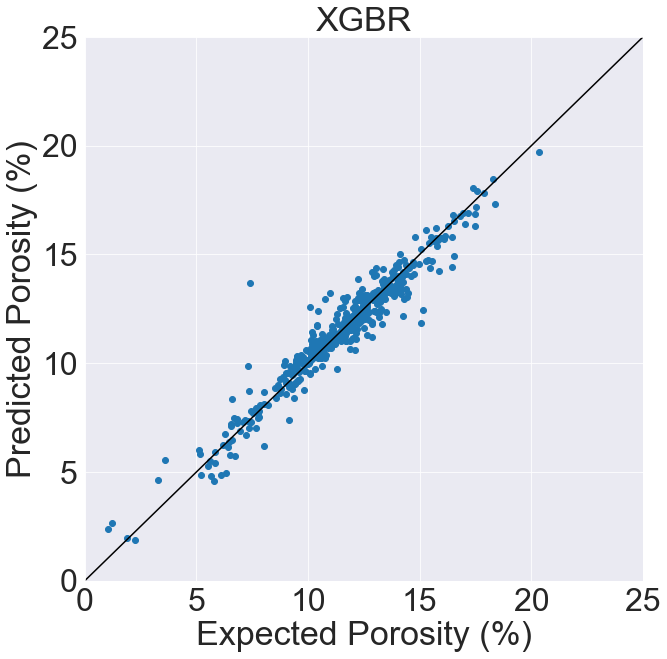

In [33]:
fig = plt.figure(figsize=(10, 10))
sns.set_style("darkgrid")
plt.scatter(y_test, y_test_pred)
plt.xlabel('Expected Porosity (%)', fontsize=34)
plt.ylabel('Predicted Porosity (%)', fontsize=34)
plt.yticks(fontsize=32)
plt.xticks(fontsize=32)
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.plot([0,25], [0,25], 'black')
plt.title('XGBR', fontsize=34)

Text(0.5, 1.0, 'XGBR')

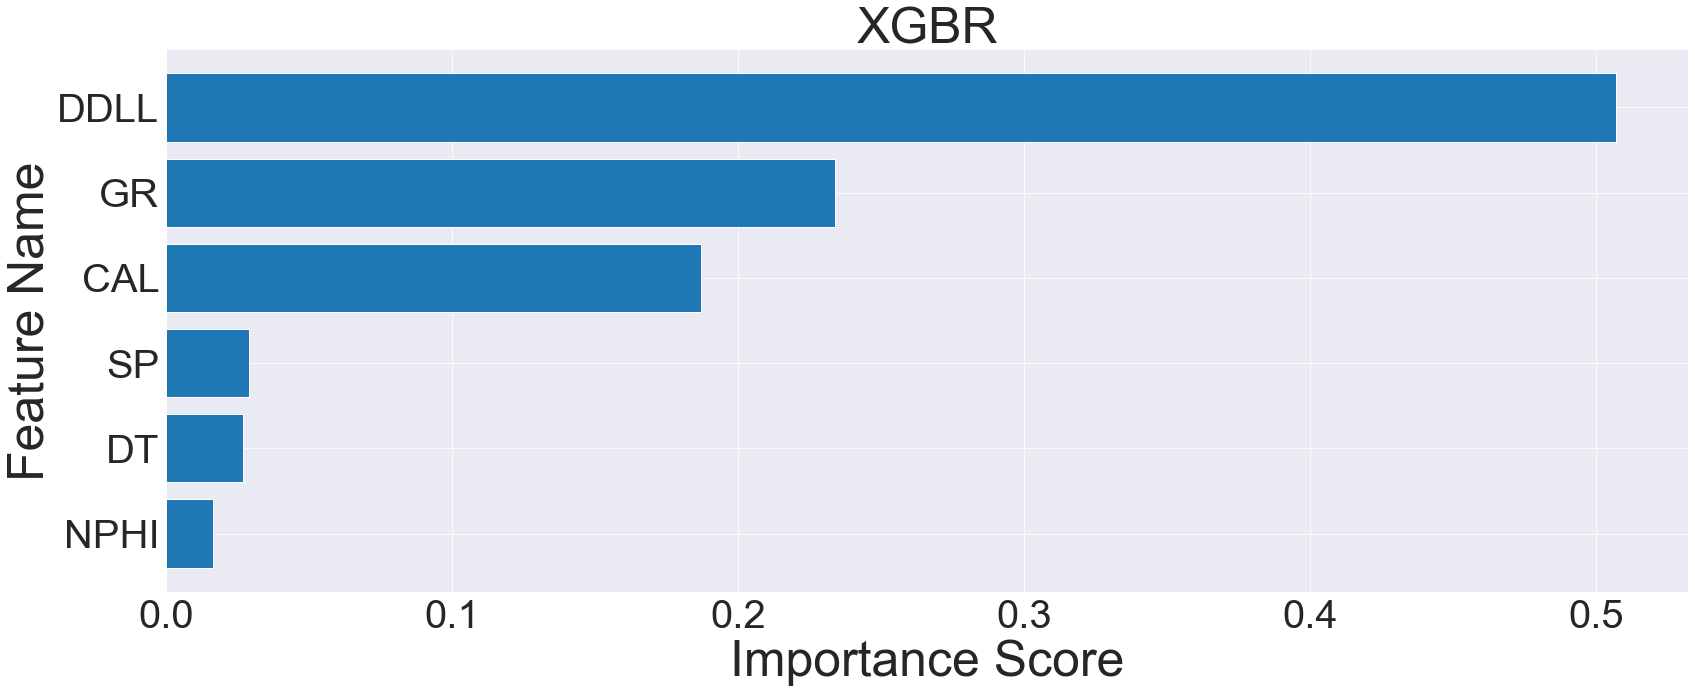

In [35]:
fig = plt.figure(figsize=(60, 10))
sns.set_style("darkgrid")
feature_importance = xgb.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.subplot(1, 2, 1)
plt.xlabel('Importance Score', fontsize=50)
plt.ylabel('Feature Name', fontsize=50)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(['GR', 'NPHI', 'DT', 'DDLL', 'CAL', 'SP'])[sorted_idx])
plt.yticks(fontsize=40)
plt.xticks(fontsize=40)
plt.title('XGBR', fontsize=50)

In [38]:
y_test

53      12.490
2391     9.547
2310    11.270
728     13.360
850      3.586
         ...  
1810     9.442
2330     6.838
684     11.520
1674    12.170
2075     8.976
Name: PHIF, Length: 500, dtype: float64

In [39]:
y_test_index=y_test.index

In [40]:
y_test_sort=y_test.sort_index(axis = 0)

In [41]:
y_test_sort_index=y_test_sort.index

In [42]:
y_test_depth = df['DEPTH'].iloc[y_test.sort_index(axis = 0).index]

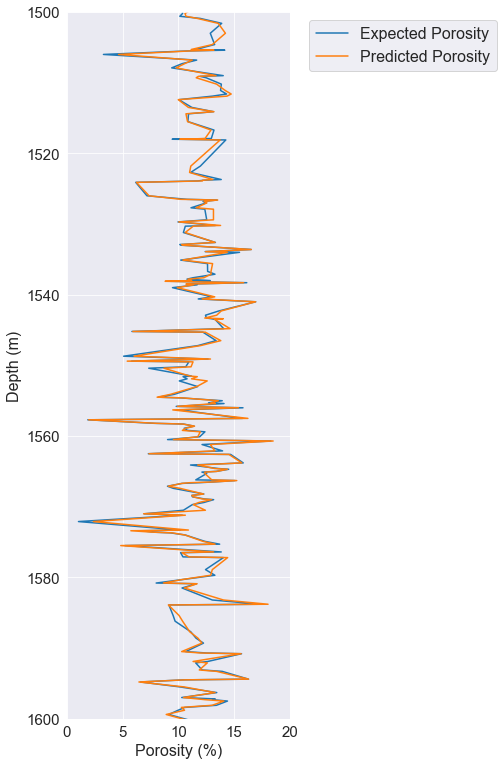

In [43]:
plt.figure(figsize=(4, 13))
sns.set_style("darkgrid")
plt.xlabel('Porosity (%)', fontsize=16)
plt.ylabel('Depth (m)', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot(y_test, y_test_depth, label = 'Expected Porosity', linewidth=1.5)
plt.plot(y_test_pred, y_test_depth, label = 'Predicted Porosity', linewidth=1.5)
plt.ylim(1600, 1500)
plt.xlim(0, 20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

Text(0.5, 1.0, 'XGBR')

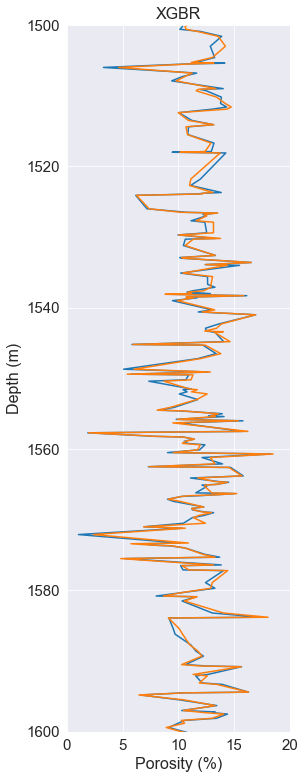

In [46]:
plt.figure(figsize=(4, 13))
sns.set_style("darkgrid")
plt.xlabel('Porosity (%)', fontsize=16)
plt.ylabel('Depth (m)', fontsize=16)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot(y_test, y_test_depth, label = 'Expected Porosity', linewidth=1.5)
plt.plot(y_test_pred, y_test_depth, label = 'Predicted Porosity', linewidth=1.5)
plt.ylim(1600, 1500)
plt.xlim(0, 20)
plt.title('XGBR', fontsize=16)